In [197]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Q1 reading data and spliting them

In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
data = pd.read_csv(r"E:\UNIVERSITY\Machine-Learning\HomeWork\HW3\Practical\Mall_Customers.csv")

# Split the data into training and test sets
X_train, X_test = train_test_split(data, test_size=0.2,random_state=42)
X_test_Out=X_test


## Q2  Drop the CustomerID column


In [199]:
# Drop the CustomerID column
X_train = X_train.drop("CustomerID", axis=1)
X_test = X_test.drop("CustomerID", axis=1)


## Q3 description of data like avg ,count, ...

In [200]:
X_train.describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,160.000000,160.000000,160.00000
mean,38.912500,60.606250,51.77500
std,13.856582,27.395105,26.42063
min,18.000000,15.000000,1.00000
25%,29.000000,39.750000,35.75000
50%,36.000000,62.000000,50.50000
75%,49.000000,78.000000,74.00000
max,70.000000,137.000000,99.00000


In [201]:
X_test.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,40.000000,40.000000,40.000000
mean,38.600000,60.375000,43.900000
std,14.588018,21.452019,22.491936
min,18.000000,19.000000,1.000000
25%,25.750000,48.000000,25.500000
50%,35.500000,60.000000,49.000000
75%,49.250000,78.000000,57.500000
max,70.000000,101.000000,88.000000


## Q4 Normalizing the data except the Gender column


In [202]:
scaler = StandardScaler()
X_train.iloc[:, 1:] = scaler.fit_transform(X_train.iloc[:, 1:])
X_test.iloc[:, 1:] = scaler.transform(X_test.iloc[:, 1:])


## Q5 Encoding the Gender column


In [203]:
# Encoding the Gender column
X_train['Gender'] = X_train['Gender'].map({'Female': 1, 'Male': 0})
X_test['Gender'] = X_test['Gender'].map({'Female': 1, 'Male': 0})



## Q6 defining kmeans function

In [204]:
def kmeans_clustering(k, df):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df)
    centers = model.cluster_centers_
    labels = model.labels_
    return model, centers, labels

## Q7 finding siutable k with elbow and silhouette

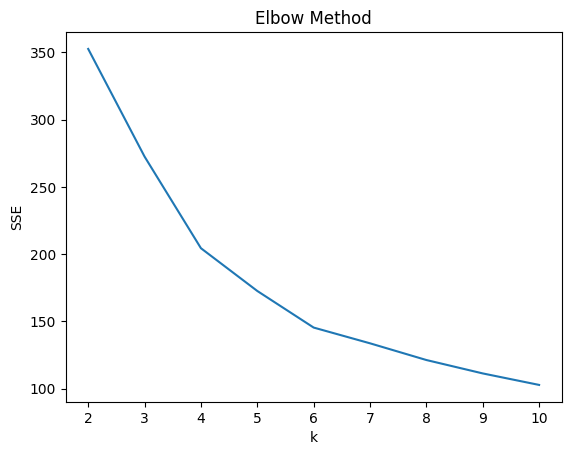

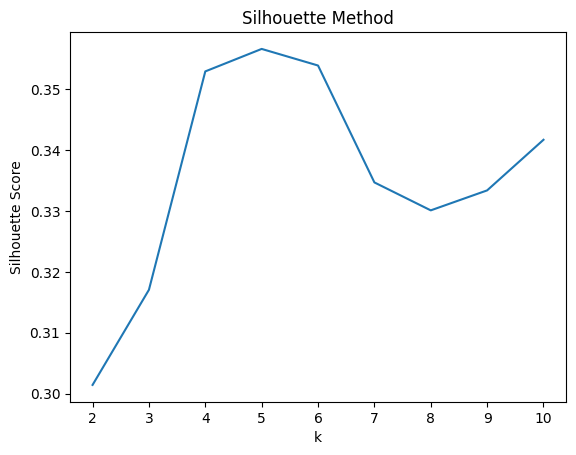

In [205]:
sse = []
k_range = range(2, 11)
for k in k_range:
    model, _, _ = kmeans_clustering(k, X_train)
    sse.append(model.inertia_)

plt.plot(k_range, sse)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

sil = []
for k in k_range:
    model, _, labels = kmeans_clustering(k, X_train)
    sil_score = silhouette_score(X_train, labels)
    sil.append(sil_score)

plt.plot(k_range, sil)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()




<p dir="rtl">
    همانطور که مشاهده میشود در دو نمودار بالا برای elbow تعداد دسته مناسب برابر 4 و برای silhouette مقدار دسته مناسب جایی است که نمودارش  بیشترین مقدار را دارد که در 5 است 
    
 

## Q8 predicting test data  based on above plots, the optimal k value is 5
## Q9 saving output in csv file

In [206]:
model, centers, labels = kmeans_clustering(5, X_train)

test_labels = model.predict(X_test)
X_test_Out["cluster"] = test_labels

X_test_Out.to_csv("predicts.csv", index=False)



## Q10 finding best k for compressed data and cluster them base them

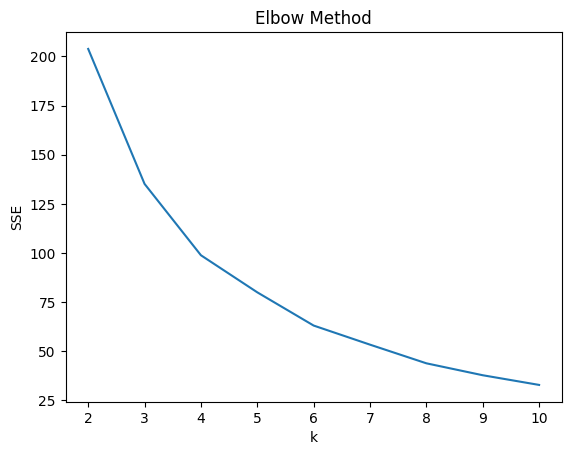

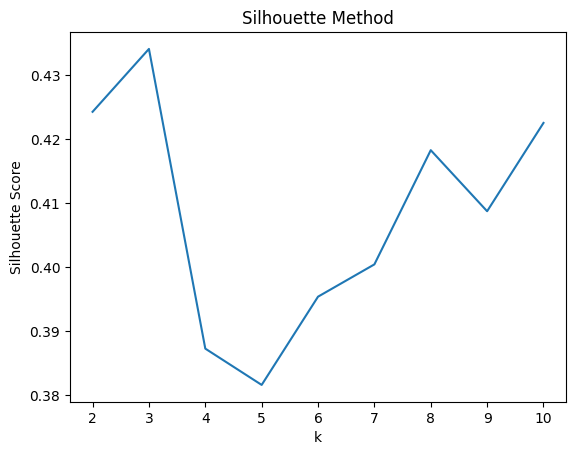

In [207]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


sse = []
k_range = range(2, 11)
for k in k_range:
    model, _, _ = kmeans_clustering(k, X_train_pca)
    sse.append(model.inertia_)

plt.plot(k_range, sse)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()



sil = []
for k in k_range:
    model, _, labels = kmeans_clustering(k, X_train_pca)
    sil_score = silhouette_score(X_train_pca, labels)
    sil.append(sil_score)

plt.plot(k_range, sil)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()






## Q11 clustring data base best k that previouse part said that is equal to 

In [208]:

model_pca,centers_pca, labels_pca = kmeans_clustering(3, X_train_pca)

y_pred_pca = model_pca.predict(X_test_pca)

X_test_Out["Cluster_PCA"] = y_pred_pca
X_test_Out.to_csv("predicts.csv", index=False)


## plote compressed data with its clustered class

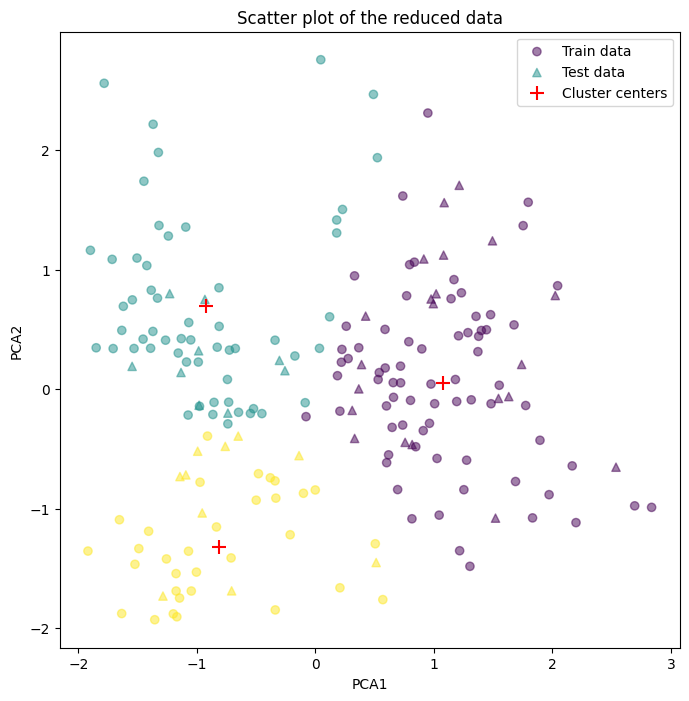

In [209]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels_pca, marker="o", alpha=0.5, label="Train data")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_pca, marker="^", alpha=0.5, label="Test data")
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c="red", marker="+", s=100, label="Cluster centers")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Scatter plot of the reduced data")
plt.legend()
plt.show()